<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/GE/GE_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import biblotek

In [ ]:
import pandas as pd
import numpy as np
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 1.0.5
Numpy: 1.18.5


Załadowanie danych

In [ ]:
def fetch_financial_data(company='GE'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-08-27 to 2015-08-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,6.520,6.630,6.450,6.480,73387919
2020-08-26,6.620,6.620,6.440,6.480,57303986
2020-08-25,6.650,6.700,6.480,6.590,69449105
2020-08-24,6.350,6.640,6.300,6.630,102785415
2020-08-21,6.250,6.380,6.230,6.310,59851459
...,...,...,...,...,...
2015-09-04,21.560,21.560,21.265,21.397,39960825
2015-09-03,22.074,22.244,21.746,21.852,37646287
2015-09-02,21.523,21.915,21.246,21.907,56619445


In [ ]:
df.head(10) # zwraca pierwsze 10 wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,6.52,6.6300,6.45,6.48,73387919
2020-08-26,6.62,6.6200,6.44,6.48,57303986
2020-08-25,6.65,6.7000,6.48,6.59,69449105
2020-08-24,6.35,6.6400,6.30,6.63,102785415
2020-08-21,6.25,6.3800,6.23,6.31,59851459
2020-08-20,6.33,6.3769,6.21,6.27,63763962
2020-08-19,6.47,6.5700,6.35,6.38,54361951
2020-08-18,6.49,6.5700,6.41,6.44,42686043
2020-08-17,6.67,6.6900,6.45,6.47,59029425


In [ ]:
df.columns # nazwy kolumn

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns] # zmiana liter na małe
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df.describe() # wyswietla statystyki 

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,17.809093,17.986614,17.627366,17.800361,6.833135e+07
std,8.334761,8.350674,8.336925,8.350018,4.877264e+07
min,5.601600,5.651500,5.471800,5.481800,1.418883e+07
25%,10.055250,10.267250,9.935000,10.065000,3.716697e+07
50%,14.342500,14.561500,14.139000,14.314500,5.411398e+07
75%,27.049000,27.328000,26.877000,27.103000,8.321889e+07
max,30.340000,30.375000,30.135000,30.311000,4.794930e+08


Eksploracja danych

In [ ]:
df[['open', 'close']] # wycinamy jako Data Frame

,open,close
Date,,
2020-08-27,6.520,6.480
2020-08-26,6.620,6.480
2020-08-25,6.650,6.590
2020-08-24,6.350,6.630
2020-08-21,6.250,6.310
...,...,...
2015-09-04,21.560,21.397
2015-09-03,22.074,21.852
2015-09-02,21.523,21.907


In [ ]:
df.iloc[:, 0] #wycinamy pierwszą kolumnę

Date
2020-08-27     6.520
2020-08-26     6.620
2020-08-25     6.650
2020-08-24     6.350
2020-08-21     6.250
               ...  
2015-09-04    21.560
2015-09-03    22.074
2015-09-02    21.523
2015-09-01    21.595
2015-08-31    22.272
Name: open, Length: 1258, dtype: float64

In [ ]:
df.iloc[:, [0, 3]] # wycinamy kilka kolumn

,open,close
Date,,
2020-08-27,6.520,6.480
2020-08-26,6.620,6.480
2020-08-25,6.650,6.590
2020-08-24,6.350,6.630
2020-08-21,6.250,6.310
...,...,...
2015-09-04,21.560,21.397
2015-09-03,22.074,21.852
2015-09-02,21.523,21.907


Wycinanie wierszy

In [ ]:
df.iloc[[0, 3],:] # wycinamy wiersz pierwszy oraz czwarty

,open,high,low,close,volume
Date,,,,,
2020-08-27,6.52,6.63,6.45,6.48,73387919
2020-08-24,6.35,6.64,6.30,6.63,102785415


In [18]:
df = df.sort_index() # sortowanie wartości
df.head()

,open,high,low,close,volume
Date,,,,,
2015-08-31,22.272,22.272,21.915,22.129,41506958
2015-09-01,21.595,21.717,21.113,21.291,73290061
2015-09-02,21.523,21.915,21.246,21.907,56619445
2015-09-03,22.074,22.244,21.746,21.852,37646287
2015-09-04,21.560,21.560,21.265,21.397,39960825


In [21]:
df['close_shift'] = df[['close']].shift(1) #przesuwamy wiersze o jeden
df.head()

,open,high,low,close,volume,Daily_Change,close_shift
Date,,,,,,,
2015-08-31,22.272,22.272,21.915,22.129,41506958,NaN,NaN
2015-09-01,21.595,21.717,21.113,21.291,73290061,22.129,22.129
2015-09-02,21.523,21.915,21.246,21.907,56619445,21.291,21.291
2015-09-03,22.074,22.244,21.746,21.852,37646287,21.907,21.907
2015-09-04,21.560,21.560,21.265,21.397,39960825,21.852,21.852


In [22]:
df['Daily_Change'] = df.close / df.close_shift -1 #dzienna zmiana procentowa
df.head()

,open,high,low,close,volume,Daily_Change,close_shift
Date,,,,,,,
2015-08-31,22.272,22.272,21.915,22.129,41506958,NaN,NaN
2015-09-01,21.595,21.717,21.113,21.291,73290061,-0.037869,22.129
2015-09-02,21.523,21.915,21.246,21.907,56619445,0.028932,21.291
2015-09-03,22.074,22.244,21.746,21.852,37646287,-0.002511,21.907
2015-09-04,21.560,21.560,21.265,21.397,39960825,-0.020822,21.852


In [23]:
df.Daily_Change.min() # najwiekszy dzienny spadek

-0.15159092648822425

In [24]:
df.Daily_Change.max() # najwiekszy dzienny wzrost

0.14728974413611118

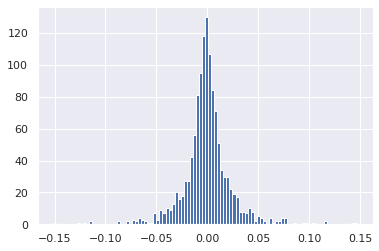

In [25]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

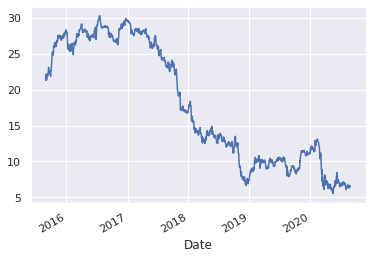

In [27]:
df.close.plot()